In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def compute_gradient_descent(X,y,iterations,alpha):
    
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    w =0
    b =0

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m
    
    for i in range(iterations):
        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db
        
    return w,b    

In [33]:
def zscore_normalize_features(X):
  
   
    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                  
    X_norm = (X - mu) / sigma      

    return (X_norm)
 

In [18]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

w,b = compute_gradient_descent(X,y,iterations=1000, alpha = 1e-2)

In [19]:
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2      #<-- added engineered feature

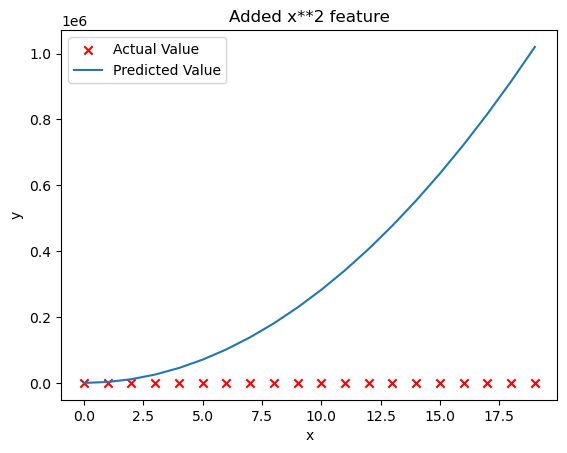

In [20]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = compute_gradient_descent(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [21]:
def compute_cost(X, y, w, b): 

    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [22]:
cost = compute_cost(X, y, w, b)

In [23]:
print(cost)

[4.63359611e+12]


In [24]:
print(w)

[18145.]


In [28]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

In [29]:
model_w,model_b = compute_gradient_descent(X, y, iterations=10000, alpha=1e-7)


ValueError: setting an array element with a sequence.

In [30]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

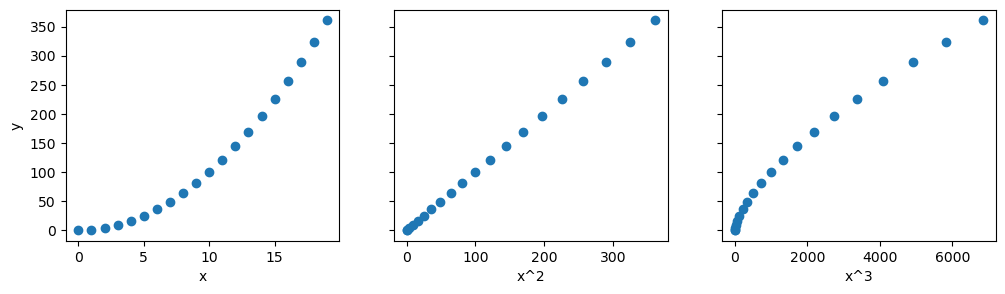

In [31]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [34]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]


In [37]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w,model_b = compute_gradient_descent(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

ValueError: setting an array element with a sequence.

In [39]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b =  compute_gradient_descent(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

ValueError: setting an array element with a sequence.